In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r'https://gist.githubusercontent.com/ryanorsinger/cb1222e506c1266b9cc808143ddbab82/raw/b2fe8213426159be7f9c8de108726d3d814153eb/mall_customers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df[['annual_income', 'spending_score']]
df

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
df.describe()

,annual_income,spending_score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

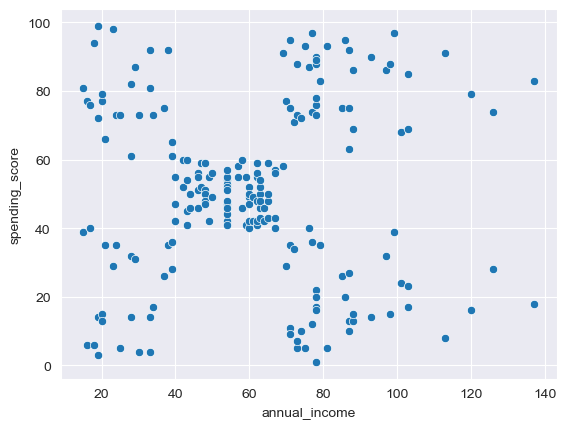

In [5]:
sns.scatterplot(df['annual_income'], df['spending_score'])

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans()
y = km.fit_predict(x)

In [9]:
km.cluster_centers_

array([[-1.35366972,  1.15873115],
       [ 0.68673384,  1.241219  ],
       [ 0.7489536 , -1.45651437],
       [ 0.14847908, -0.14558085],
       [-1.35185213, -1.19089759],
       [ 1.87564575,  1.23452563],
       [-0.48996553,  0.02444932],
       [ 1.87564575, -1.09476801]])

In [10]:
x = pd.DataFrame(x)
x['Cluster'] = y 
x

,0,1,Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,5
196,2.497807,-0.861839,7
197,2.497807,0.923953,5
198,2.917671,-1.250054,7


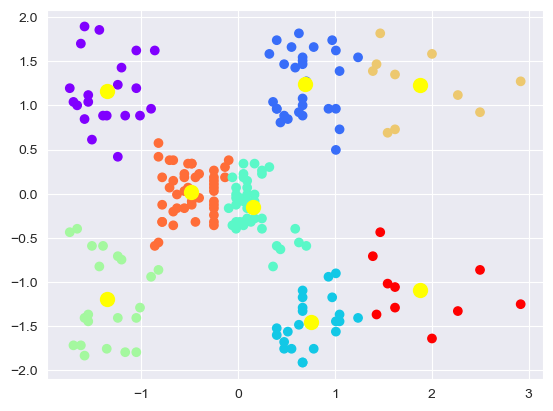

In [11]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = x['Cluster'], cmap = 'rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [12]:
x1 = x.iloc[:,:-1]

# Elbow Graph

In [13]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters = i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [14]:
wcss

[399.99999999999994,
 270.026160844515,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.16866212532135,
 32.33081392367576,
 29.998911736991996,
 26.230634148456048,
 23.685349284338127,
 21.135534115679146,
 18.91368340508949,
 18.269743911867458,
 16.008481869658183,
 14.692182556433504,
 14.038632420601964,
 12.754738073713455,
 12.362654559120712,
 11.314385821779904,
 10.686002067142628,
 10.155541128447037,
 9.35505031032678]

Text(0, 0.5, 'WCSS')

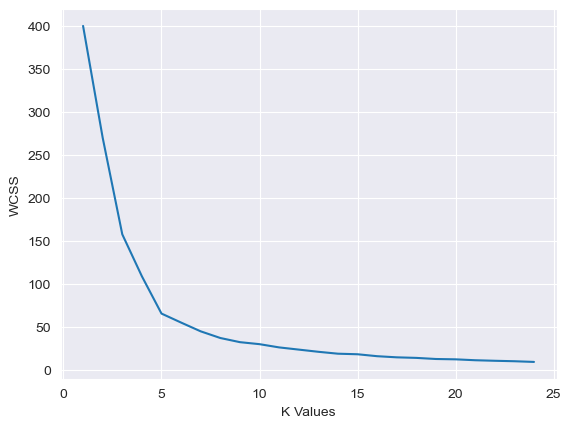

In [15]:
plt.plot(range(1,25), wcss)
plt.xlabel('K Values')
plt.ylabel('WCSS')

In [17]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(x1)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [19]:
x1['Cluster'] = y
x1

,0,1,Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


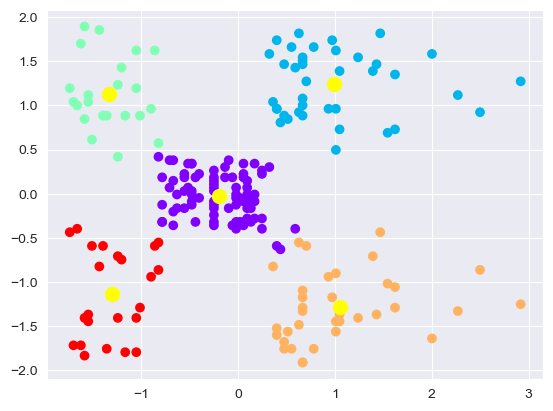

In [22]:
plt.scatter(x1.iloc[:,0], x1.iloc[:,1], c = x1['Cluster'], cmap = 'rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [25]:
df['Y'] = y
df

,annual_income,spending_score,Y
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [27]:
df.groupby('Y').agg('mean')

,annual_income,spending_score
Y,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [29]:
df[df['Y'] == 1]

,annual_income,spending_score,Y
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
x = df.iloc[:,:-1]
y = df['Y']
x

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [35]:
lg = LogisticRegression()
lg.fit(xtrain, ytrain)
ypred = lg.predict(xtest)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      0.75      0.86         8

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40

